<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
from typing import List, Tuple, Dict, Optional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

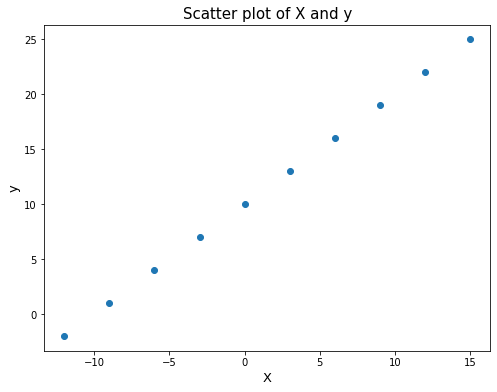

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to improve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 927ms/step - loss: 19.1483 - mae: 19.1483
Epoch 2/5
1/1 [==============================] - 0s 27ms/step - loss: 18.6706 - mae: 18.6706
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 18.1929 - mae: 18.1929
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 17.7152 - mae: 17.7152
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 17.2375 - mae: 17.2375


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 462ms/step


array([[-15.287334]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[-4.2873344]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.1459 - mae: 11.1459
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 11.1134 - mae: 11.1134
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 11.0809 - mae: 11.0809
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0484 - mae: 11.0484
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0159 - mae: 11.0159
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9834 - mae: 10.9834
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 10.9509 - mae: 10.9509
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9184 - mae: 10.9184
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8859 - mae: 10.8859
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 10.8534 - mae: 10.8534
Epoch 11/100
1/1 [==============================] -

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 411ms/step


array([[30.080938]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.1188 - mae: 12.1188
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7053 - mae: 11.7053
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.3382 - mae: 11.3382
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9674 - mae: 10.9674
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 10.5937 - mae: 10.5937
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.2152 - mae: 10.2152
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8245 - mae: 9.8245
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 9.4185 - mae: 9.4185
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 8.9939 - mae: 8.9939
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 8.5475 - mae: 8.5475
Epoch 11/100
1/1 [==============================] - 0s 19ms

In [12]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 206ms/step


array([[32.936886]], dtype=float32)

### Try Using A Different Optimizer

* e.g. Adam

In [13]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(units=1),
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.3950 - mae: 13.3950
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 12.3729 - mae: 12.3729
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 11.5991 - mae: 11.5991
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 10.9254 - mae: 10.9254
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6181 - mae: 10.6181
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3241 - mae: 10.3241
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0374 - mae: 10.0374
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.7533 - mae: 9.7533
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4685 - mae: 9.4685
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1802 - mae: 9.1802
Epoch 11/100
1/1 [==============================] - 0s 12

In [14]:
# Make predictions
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 356ms/step


array([[29.070885]], dtype=float32)

### Evaluate The Model Performance

* It's a good idea to `visualize`.
* We can visualize the following:

  1. Data.
  2. Model.
  3. Model training.
  4. The model predictions.

In [15]:
# Create a bigger data
X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float16)
y = X + 10


# Turn it into a matrix
X = tf.expand_dims(X, axis=-1)


tf.size(X).numpy()

50

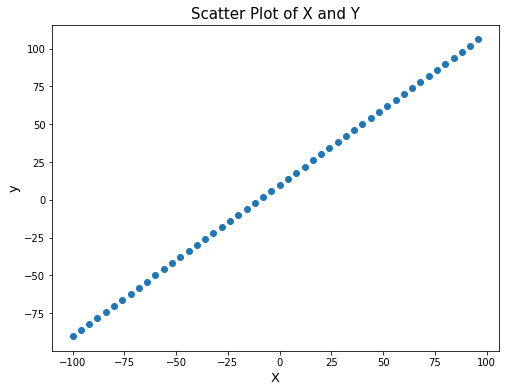

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)

plt.show()

In [17]:
0.8 * X.shape[0]

40.0

In [18]:
# Split the data
X_train, X_val = X[:40], X[40:]
y_train, y_val = y[:40], y[40:]

X_train.shape, X_val.shape

(TensorShape([40, 1]), TensorShape([10, 1]))

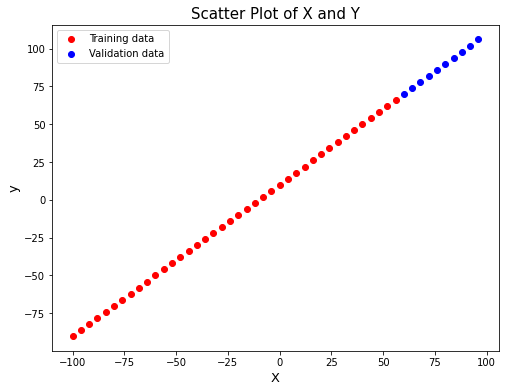

In [19]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color="red", label="Training data")
plt.scatter(X_val, y_val, color="blue", label="Validation data")
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)
plt.legend()

plt.show()

### Visualize The Data Split

In [20]:
# from sklearn.model_selection import train_test_split



# RANDOM_STATE, TEST_SIZE = 123, 0.2

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# X_train.shape, X_val.shape

In [21]:
# Build model (with input shape)
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="neural_net_1")

# Compile 
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])



In [22]:
# Model Summary
model_2.summary()

Model: "neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Some Key Terms
* **Total params**: total number of parameters the model needs to learn.
* **Trainable params**: these are the parameters (patterns) that the model can update as it trains.
* **Non-trainable params**: these parameters are not updated during training. this is typical when you use already learned parameters from other models during training (i.e transfer learning)

In [23]:
# Fit 
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 32.0268 - mae: 32.0268
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 20.4252 - mae: 20.4252
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 31.3896 - mae: 31.3896
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 20.3978 - mae: 20.3978
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 21.1031 - mae: 21.1031
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 14.5955 - mae: 14.5955
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 21.0451 - mae: 21.0451
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 18.2557 - mae: 18.2557
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2812 - mae: 11.2812
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 16.3401 - mae: 16.3401
Epoch 11/100
2/2 [==============================] 

### Visualize The Model

[![image.png](https://i.postimg.cc/XJnBMPTk/image.png)](https://postimg.cc/Lq08Lx4J)

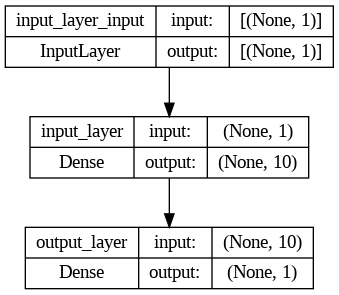

In [24]:
# from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model


plot_model(model_2, show_shapes=True)

In [25]:
def plot_prediction(X_train=X_train, 
                    X_val=X_val, 
                    y_train=y_train, 
                    y_val=y_val, 
                    y_predictions=y_pred) -> "Plot":
  """This is used to visualize the model predictions.

  Params:
    X_train (tf.tensor): The training data.
    X_val (tf.tensor): The validation data.
    y_train (tf.tensor): The labels of the training data.
    y_train (tf.tensor): The labels of the validation data.
    y_pred (tf.tensor): The predicted data.

  Returns:
    None
  """
  # Visualize the data
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, color="red", label="Training data")
  plt.scatter(X_val, y_val, color="blue", label="Validation data")
  plt.scatter(X_val, y_predictions, color="green", label="Predicted data")
  plt.xlabel("X", size=13)
  plt.ylabel("y", size=13)
  plt.title("Scatter Plot of X and Y", size=15)
  plt.legend()

  plt.show()

In [26]:
# Make predictions
y_pred_2 = model_2.predict(X_val)

1/1 [==============================] - 0s 59ms/step


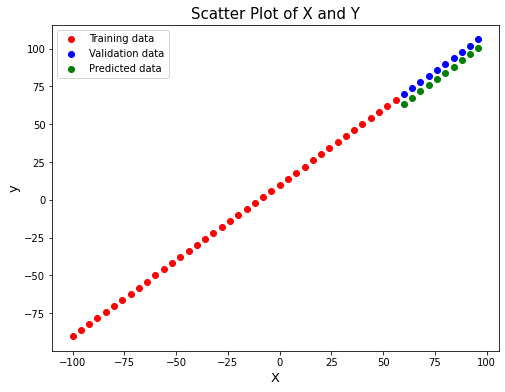

In [27]:
plot_prediction(y_predictions=y_pred_2)

In [28]:
# Evaluate
model_2.evaluate(X_val, y_val)

1/1 [==============================] - 0s 151ms/step - loss: 6.0642 - mae: 6.0642


[6.064248561859131, 6.064248561859131]

### Mean Absolute Error And Mean Squared Error [Challenge]

> Implement the following:

1. Mean Absolute Error

```python
tf.keras.losses.MAE()

# OR
tf.metrics.mean_absolute_error()
```

$$
mae = \frac{\sum^n_{i=1}{|y_{i}} - \hat{y}_{i}|}{n}
$$

2. Mean Squared Error

```python
tf.keras.losses.MSE()

# OR
tf.metrics.mean_squared_error()
```

$$
mse = \frac{\sum^n_{i=1}{(y_{i}} - \hat{y}_{i})^2}{n}
$$

In [29]:
from typing import Tuple

def mean_absolute_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Absolute Error."""
  mae = tf.math.reduce_mean(tf.math.abs(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mae


def mean_squared_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Squared Error."""
  mse = tf.math.reduce_mean(tf.math.square(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mse


def evaluate_model(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> Tuple[float]:
  """This returns a tuple containing the calculated MAE and MSE."""
  mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
  mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
  return (mae, mse)

In [30]:
mae_2 = mean_absolute_error(y_true=y_val, y_pred=y_pred_2)
print(mae_2)

mse_2 = mean_squared_error(y_true=y_val, y_pred=y_pred_2)

mse_2

tf.Tensor(6.07, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=36.97>

In [31]:
# OR
tf.keras.losses.MAE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=6.064248>

In [32]:
# Mean Squared Error
tf.keras.losses.MSE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=36.885822>

#### Build The 3rd Model

* 2 layers 
* 500 epochs

In [33]:
tf.random.set_seed(SEED)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[1], activation=None),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 35.5483 - mse: 1884.1764
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 20.2576 - mse: 661.6781
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 27.2895 - mse: 1131.6399
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 18.3276 - mse: 502.6044
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 11.0407 - mse: 140.6774
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 13.1792 - mse: 221.3484
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.6986 - mse: 472.6796
Epoch 8/500
2/2 [==============================] - 0s 15ms/step - loss: 7.6350 - mse: 84.9227
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 21.6448 - mse: 728.1432
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 10.5717 - mse: 136.9329
Epoch 11/500
2/2 [==========================

In [34]:
# Evaluate model performance
model_3.evaluate(X_val, y_val)

1/1 [==============================] - 0s 230ms/step - loss: 45.8984 - mse: 2157.9702


[45.89836883544922, 2157.97021484375]

In [35]:
# Make predictions
y_pred_3 = model_3.predict(X_val)

1/1 [==============================] - 0s 80ms/step


In [36]:
mae_3 = mean_absolute_error(y_true=y_val, y_pred=y_pred_3)
print(mae_3)

mse_3 = mean_squared_error(y_true=y_val, y_pred=y_pred_3)
mse_3

tf.Tensor(45.9, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=2156.0>

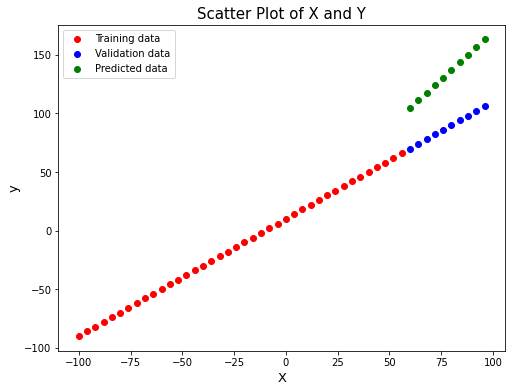

In [37]:
# Visualize the predictions
plot_prediction(y_predictions=y_pred_3)

### Saving TensorFlow Models

1. Using the dafault format: `model.save('my_model')`

2. Using HDF5 format: `model.save('my_model.h5)`

In [38]:
# Save model
model_2.save("model_2")

### Load Model

* `tf.keras.models.load_model('my_model')`

In [39]:
# Load the model
loaded_model_2 = tf.keras.models.load_model("model_2")

In [40]:
# Verify that the models are the same!
load_model_pred_2 = loaded_model_2.predict(X_val)

y_pred_2 == load_model_pred_2

1/1 [==============================] - 0s 94ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### How To Download Files From Colab

```python
from google.colab import files

files.download('filepath')
```

<hr><br>

## Working With More Data

### The data can be found [here](https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv).

In [41]:
import pandas as pd


# Load data
fp = "https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"
data = pd.read_csv(fp)
print(f"Shape of data: {data.shape}\n")

data.head()

Shape of data: (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
# Preprocess the data
one_hot_enc_data = pd.get_dummies(data)

one_hot_enc_data.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0


In [43]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "charges"

X = one_hot_enc_data.drop(columns=[TARGET])  # Matrix
y = one_hot_enc_data[TARGET]  # Vector

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, 
                                                  random_state=RANDOM_STATE)

X_train.shape, X_val.shape

((1070, 11), (268, 11))

#### Build 1st Model

* Baseline model

In [44]:
tf.random.set_seed(SEED)

# Build model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[X_train.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=1, activation=None, name="output_layer")
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8417.8779 - mae: 8417.8779
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7779.4888 - mae: 7779.4888
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7428.3843 - mae: 7428.3843
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7770.5469 - mae: 7770.5469
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7601.7256 - mae: 7601.7256
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7825.4502 - mae: 7825.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7774.4404 - mae: 7774.4404
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7538.8774 - mae: 7538.8774
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7488.6494 - mae: 7488.6494
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7616.5576 - mae: 7616.5576

In [45]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Evaluate model
model_1.evaluate(X_val, y_val)

9/9 [==============================] - 0s 2ms/step - loss: 7346.4180 - mae: 7346.4180


[7346.41796875, 7346.41796875]

In [47]:
y_train.describe()

count     1070.000000
mean     13189.257683
std      12043.848125
min       1121.873900
25%       4565.996850
50%       9303.297725
75%      16791.384968
max      62592.873090
Name: charges, dtype: float64

#### Comment

* The baseline model isn't performing too well.
* The **mae** is ~7300 which means that it gets the predictions wrong on average by a value of 7300.
* This isn't good since the median y_train value is **~9300** and this means that we could be charging someone about **2000** when we should actually charge them **9300** 😲

In [48]:
# Make predictions
y_pred_1 = model_1.predict(X_val)

9/9 [==============================] - 0s 2ms/step


### Improve The Model

* Build an improved model by increasing the number of hidden layers / neurons.

In [49]:
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1, name="output_layer")
])

# Compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit/Train
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13126.8154 - mae: 13126.8154
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12959.2432 - mae: 12959.2432
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12609.4912 - mae: 12609.4912
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11921.6348 - mae: 11921.6348
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10780.2656 - mae: 10780.2656
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9360.2852 - mae: 9360.2852
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8131.4297 - mae: 8131.4297
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7544.3101 - mae: 7544.3101
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7440.1689 - mae: 7440.1689
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7413.1943 - mae:

In [50]:
# Evaluate model
model_2.evaluate(X_val, y_val)

y_pred_2 = model_2.predict(X_val)

9/9 [==============================] - 0s 2ms/step


### Build Another Model

* Train with more `epochs`.

In [51]:
tf.random.set_seed(SEED)

# build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train.shape[-1]], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Model summary
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer (Dense)        (None, 10)                1010      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Fit
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13112.6367 - mae: 13112.6367
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12930.1758 - mae: 12930.1758
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12551.9805 - mae: 12551.9805
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11828.7109 - mae: 11828.7109
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10668.6982 - mae: 10668.6982
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9268.9443 - mae: 9268.9443
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8084.6460 - mae: 8084.6460
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7542.2725 - mae: 7542.2725
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7444.3281 - mae: 7444.3281
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7417.0967 - mae:

In [53]:
# Evaluate
model_3.evaluate(X_val, y_val)

y_pred_3 = model_3.predict(X_val)

9/9 [==============================] - 0s 2ms/step


In [54]:
def plot_training_curve(*, history: Dict) -> "Plot":
  """This is used to plot the training curve."""
  history_df = pd.DataFrame(history.history)

  history_df.plot()
  plt.title("Training Curve", size=15)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

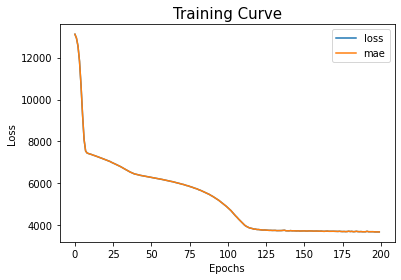

In [55]:
# Plot History (AKA Training Curve)
plot_training_curve(history=history)

### How long should I train the model??

* It depends. TensorFlow has a component, `EarlyStopping Callback` which can be added to the model once it stops improving a certain model metric.

### Normalizing And Standardizing Data

* **Normalizing:** This is used to to convert all values in the data to a common scale such that the new values range from 0 to 1. Neural Networks work better with normalized values.

* **Standardization:** This is used to convert all values in the data such that the mean is 0 and the standard deviation of the values is 1.

In [56]:
X.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


In [57]:
X_train.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.124299,30.645379,1.082243,0.494393,0.505607,0.800000,0.200000,0.238318,0.252336,0.278505,0.230841
std,14.114475,6.020488,1.221404,0.500202,0.500202,0.400187,0.400187,0.426254,0.434556,0.448473,0.421568
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.410000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.302500,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.560000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


class CustomeOneHotEncoder(BaseEstimator, TransformerMixin):
  """This is used to one_hot encode the data."""

  def __init__(self) -> None:
    pass

  @staticmethod
  def _one_hot_encode(X:pd.DataFrame) -> pd.DataFrame:
    """This is used to one_hot encode the data."""
    enc_data = pd.get_dummies(X)
    return enc_data

  def fit(self, X, y=None) -> None:
    """This is a required step for sklearn transformers."""
    return self

  def transform(self, X:pd.DataFrame) ->pd.DataFrame:
    """This is used to apply the tranformation."""
    X = X.copy()
    return self._one_hot_encode(X)


In [59]:
preprocessor = Pipeline(steps=[
    # ===== OneHot Encode =====
    ("onehot_enc", CustomeOneHotEncoder()),

    # ===== Normalize the data =====
    ("normalizer", MinMaxScaler())
])

preprocessor

Pipeline(steps=[('onehot_enc', CustomeOneHotEncoder()),
                ('normalizer', MinMaxScaler())])

In [60]:
X_train_scaled = preprocessor.fit_transform(X_train) 
X_val_scaled = preprocessor.transform(X_val)

In [61]:
# Build model
tf.random.set_seed(SEED)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train_scaled.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
])

# Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit
history = model_4.fit(X_train_scaled, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13185.7959 - mae: 13185.7959
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13175.2207 - mae: 13175.2207
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13149.7812 - mae: 13149.7812
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13098.7129 - mae: 13098.7129
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13011.1494 - mae: 13011.1494
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 12876.4492 - mae: 12876.4492
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12684.6621 - mae: 12684.6621
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12425.7910 - mae: 12425.7910
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12090.1113 - mae: 12090.1113
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11676.04

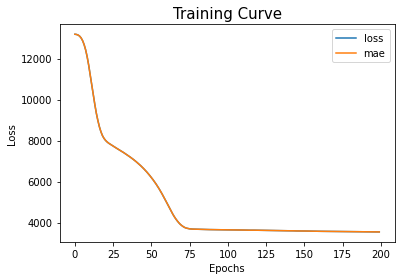

In [62]:
plot_training_curve(history=history)

In [63]:
# Evaluate
model_4.evaluate(X_val_scaled, y_val)

y_pred_4 = model_4.predict(X_val_scaled)

9/9 [==============================] - 0s 2ms/step


### Build A Larger Model

* Increase the number of layers

In [64]:
# Build
tf.random.set_seed(SEED)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train_scaled.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_1"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, name="output_layer")
  ])

# Compile 
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Summary
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                1010      
                                                                 
 hidden_layer_2 (Dense)      (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,331
Trainable params: 2,331
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Fit
history = model_5.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13186.7969 - mae: 13186.7969
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13171.7783 - mae: 13171.7783
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13114.2490 - mae: 13114.2490
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12941.2402 - mae: 12941.2402
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12529.0225 - mae: 12529.0225
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 11710.3262 - mae: 11710.3262
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 10488.3467 - mae: 10488.3467
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 9233.4971 - mae: 9233.4971
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8371.4658 - mae: 8371.4658
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 8009.2793 - 

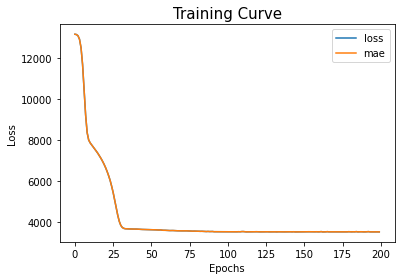

In [66]:
# Training curve
plot_training_curve(history=history)

In [67]:
# Evaluate 
model_5.evaluate(X_val_scaled, y_val)


y_pred_5 = model_5.predict(X_val_scaled)

9/9 [==============================] - 0s 3ms/step


### Adjust The Learning Rate (model_6)

* By default, the learning_rate of the Adam optimizer is `0.0001`.
* Change the value to `0.01`

In [68]:
X_train_scaled.shape[-1]

11

In [69]:
# Build Model
tf.random.set_seed(SEED)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, input_shape=[X_train_scaled.shape[-1]], 
                          name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_1"),
    tf.keras.layers.Dense(units=10, name="hidden_layer_2"),
    tf.keras.layers.Dense(units=1, name="output_layer_1"),
])

# Compile
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# Fit
history = model_6.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 3s 3ms/step - loss: 12837.9863 - mae: 12837.9863
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 8740.8154 - mae: 8740.8154
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7202.7783 - mae: 7202.7783
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 5537.7793 - mae: 5537.7793
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3736.7749 - mae: 3736.7749
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3668.3271 - mae: 3668.3271
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3627.0149 - mae: 3627.0149
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3601.4016 - mae: 3601.4016
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3624.2188 - mae: 3624.2188
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3613.7754 - mae: 3613.77

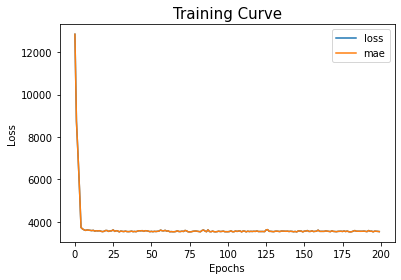

In [70]:
# Training curve
plot_training_curve(history=history)

In [71]:
# Evaluate 
model_6.evaluate(X_val_scaled, y_val)

y_pred_6 = model_6.predict(X_val_scaled)

9/9 [==============================] - 0s 2ms/step
